### Summary:
In this notebook I'll calculate the proportion of each cell type in each donor data and then test for associations with per-donor metadata, both continuous and discrete. 

Required inputs:
- Final Seurat object with metadata columns for donor ID (library here) and cell type (major_celltypes_fin here)

In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(stringr))
suppressMessages(library(tictoc))

suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
suppressMessages(library(RColorBrewer))

# Set up

In [2]:
outdir <- '/dir/to/write/outputs/to'

In [3]:
celltypes <- c('beta', 'alpha', 'delta', 'gamma', 'acinar',
               'ductal', 'endothelial', 'immune', 'stellate')

samples <- c('R207','R217','R218','R221','R223',
             'R226','R228','R234','R237','R238',
             'R246', 'R247', 'R275', 'R284', 
             'R290', 'R292', 'R316', 'R317', 'R319',
             'R325','R326','R327','R332',
             'R353','R354','R362','R363','R364')
length(samples)

[1] 28

In [4]:
major_colors = c('acinar'='#09850B', 'alpha'='#F51646', 'beta'='#3F98E0',
                 'delta'='#E39E14', 'ductal'='#F5DE6C', 'endothelial'='#752BBA', 
                 'gamma'='#A1D99B', 'immune'='#F598C9', 'stellate'='#FDBB84')

# Calculate cell type proportions per sample

In [ ]:
# Read in the final Seurat object
indir <- "/dir/with/final/object"
rds_fp <- file.path(indir,"final_object.rds")
tic()
adata <- readRDS(rds_fp)
toc()

In [213]:
# Calculate proportion of each celltype across samples
ct_counts <- list()

for (sample in samples){
    sample_matrix <- adata@meta.data[adata$library == sample,]
    props <- c()
    for (celltype in celltypes){
        prop_ct <- sum(sample_matrix$major_celltypes_fin == celltype)/dim(sample_matrix)[1]
        props <- c(props, prop_ct)
    }
    ct_counts[[sample]] <- props
}

# Reformat results and add onto meta df
props_df <- data.frame(t(as.data.frame(ct_counts)))
colnames(props_df) <- paste(celltypes, '_total_prop',sep='')
head(props_df)

,beta_total_prop,alpha_total_prop,delta_total_prop,gamma_total_prop,acinar_total_prop,ductal_total_prop,endothelial_total_prop,immune_total_prop,stellate_total_prop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,0.5168054,0.32410371,0.03473111,0.015845070,0.09282971,0.007202305,0.0012804097,0.0052816901,0.001920615
R217,0.2546716,0.06193273,0.02669514,0.101263570,0.44296138,0.109272112,0.0003559352,0.0017796761,0.001067806
R218,0.6887661,0.10451197,0.06123389,0.038213628,0.07596685,0.023941068,0.0009208103,0.0018416206,0.004604052
R221,0.2156263,0.18461852,0.03733170,0.008975928,0.48735210,0.059975520,0.0016319869,0.0010199918,0.003467972
R223,0.5443796,0.25476904,0.03547217,0.015923065,0.11209207,0.032003784,0.0011035787,0.0012612329,0.002995428
R226,0.5523939,0.25421707,0.03288465,0.013460555,0.13886522,0.005793150,0.0003407736,0.0006815471,0.001363094


In [214]:
# scale counts
props_df_scaled <- sqrt(props_df)
colnames(props_df_scaled) <- paste0(colnames(props_df), '_sqrt')
props <- cbind(props_df,props_df_scaled)
head(props)

,beta_total_prop,alpha_total_prop,delta_total_prop,gamma_total_prop,acinar_total_prop,ductal_total_prop,endothelial_total_prop,immune_total_prop,stellate_total_prop,beta_total_prop_sqrt,alpha_total_prop_sqrt,delta_total_prop_sqrt,gamma_total_prop_sqrt,acinar_total_prop_sqrt,ductal_total_prop_sqrt,endothelial_total_prop_sqrt,immune_total_prop_sqrt,stellate_total_prop_sqrt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,0.5168054,0.32410371,0.03473111,0.015845070,0.09282971,0.007202305,0.0012804097,0.0052816901,0.001920615,0.7188918,0.5693011,0.1863629,0.12587720,0.3046797,0.08486639,0.03578281,0.07267524,0.04382482
R217,0.2546716,0.06193273,0.02669514,0.101263570,0.44296138,0.109272112,0.0003559352,0.0017796761,0.001067806,0.5046500,0.2488629,0.1633865,0.31821937,0.6655534,0.33056333,0.01886625,0.04218621,0.03267730
R218,0.6887661,0.10451197,0.06123389,0.038213628,0.07596685,0.023941068,0.0009208103,0.0018416206,0.004604052,0.8299193,0.3232831,0.2474548,0.19548306,0.2756208,0.15472902,0.03034486,0.04291411,0.06785316
R221,0.2156263,0.18461852,0.03733170,0.008975928,0.48735210,0.059975520,0.0016319869,0.0010199918,0.003467972,0.4643558,0.4296726,0.1932141,0.09474138,0.6981061,0.24489900,0.04039786,0.03193731,0.05888949
R223,0.5443796,0.25476904,0.03547217,0.015923065,0.11209207,0.032003784,0.0011035787,0.0012612329,0.002995428,0.7378209,0.5047465,0.1883406,0.12618663,0.3348015,0.17889601,0.03322016,0.03551384,0.05473050
R226,0.5523939,0.25421707,0.03288465,0.013460555,0.13886522,0.005793150,0.0003407736,0.0006815471,0.001363094,0.7432321,0.5041994,0.1813412,0.11601963,0.3726462,0.07611275,0.01846005,0.02610646,0.03692011


In [26]:
# Write to file
prop_fp <- file.path(outdir, 'Celltype_donor_prop_wsqrt.txt')
write.table(props, prop_fp, sep='\t', quote=FALSE)

# Read in inputs for associations

## Read in cell type proportions per sample

In [5]:
#read in either 10k scaled counts or sqrt compartment proportion 
prop_fp <- file.path(outdir, 'Celltype_donor_prop_wsqrt.txt')
df <- read.table(prop_fp, sep='\t')
head(df)
colnames(df)

,beta_total_prop,alpha_total_prop,delta_total_prop,gamma_total_prop,acinar_total_prop,ductal_total_prop,endothelial_total_prop,immune_total_prop,stellate_total_prop,beta_total_prop_sqrt,alpha_total_prop_sqrt,delta_total_prop_sqrt,gamma_total_prop_sqrt,acinar_total_prop_sqrt,ductal_total_prop_sqrt,endothelial_total_prop_sqrt,immune_total_prop_sqrt,stellate_total_prop_sqrt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,0.5168054,0.32410371,0.03473111,0.015845070,0.09282971,0.007202305,0.0012804097,0.0052816901,0.001920615,0.7188918,0.5693011,0.1863629,0.12587720,0.3046797,0.08486639,0.03578281,0.07267524,0.04382482
R217,0.2546716,0.06193273,0.02669514,0.101263570,0.44296138,0.109272112,0.0003559352,0.0017796761,0.001067806,0.5046500,0.2488629,0.1633865,0.31821937,0.6655534,0.33056333,0.01886625,0.04218621,0.03267730
R218,0.6887661,0.10451197,0.06123389,0.038213628,0.07596685,0.023941068,0.0009208103,0.0018416206,0.004604052,0.8299193,0.3232831,0.2474548,0.19548306,0.2756208,0.15472902,0.03034486,0.04291411,0.06785316
R221,0.2156263,0.18461852,0.03733170,0.008975928,0.48735210,0.059975520,0.0016319869,0.0010199918,0.003467972,0.4643558,0.4296726,0.1932141,0.09474138,0.6981061,0.24489900,0.04039786,0.03193731,0.05888949
R223,0.5443796,0.25476904,0.03547217,0.015923065,0.11209207,0.032003784,0.0011035787,0.0012612329,0.002995428,0.7378209,0.5047465,0.1883406,0.12618663,0.3348015,0.17889601,0.03322016,0.03551384,0.05473050
R226,0.5523939,0.25421707,0.03288465,0.013460555,0.13886522,0.005793150,0.0003407736,0.0006815471,0.001363094,0.7432321,0.5041994,0.1813412,0.11601963,0.3726462,0.07611275,0.01846005,0.02610646,0.03692011


[1] "beta_total_prop"             "alpha_total_prop"           
 [3] "delta_total_prop"            "gamma_total_prop"           
 [5] "acinar_total_prop"           "ductal_total_prop"          
 [7] "endothelial_total_prop"      "immune_total_prop"          
 [9] "stellate_total_prop"         "beta_total_prop_sqrt"       
[11] "alpha_total_prop_sqrt"       "delta_total_prop_sqrt"      
[13] "gamma_total_prop_sqrt"       "acinar_total_prop_sqrt"     
[15] "ductal_total_prop_sqrt"      "endothelial_total_prop_sqrt"
[17] "immune_total_prop_sqrt"      "stellate_total_prop_sqrt"

In [6]:
# prep list of cell type prop values to test -- adjust based on input data
ct_props <- paste(celltypes, 'total_prop_sqrt', sep='_')
ct_props
table(ct_props %in% colnames(df))

[1] "beta_total_prop_sqrt"        "alpha_total_prop_sqrt"      
[3] "delta_total_prop_sqrt"       "gamma_total_prop_sqrt"      
[5] "acinar_total_prop_sqrt"      "ductal_total_prop_sqrt"     
[7] "endothelial_total_prop_sqrt" "immune_total_prop_sqrt"     
[9] "stellate_total_prop_sqrt"


TRUE 
   9 

## Read in detailed donor metadata

In [7]:
# Read in expanded metadata table
meta_dir <- '/dir/with/donor/metadata'
meta_fp <- file.path(meta_dir, 'donor_metadata_file.tsv')
meta <- read.table(meta_fp, sep='\t')

#cut down to columns of interest and rename some
meta <- meta %>% select(age, body_mass_index, glycated_hemoglobin, sex, culture_time, cold_ischemia_time, 
                        pancreas_weight, purity, pancreas_consistency, collagenase_type) %>%
        rename(BMI=body_mass_index, HbA1c=glycated_hemoglobin)

#scale all continuous variables
cont_vars <- colnames(meta)[c(1,2,3,5,6,7,8)]
for (col_name in cont_vars){
    new_name <- paste0('scaled_', col_name)
    meta[new_name] <- as.double(scale(meta[,col_name]))
    meta <- meta %>% relocate(all_of(new_name), .after=all_of(col_name))
}

dim(meta)
#head(meta)

[1] 28 17

In [8]:
#add in proportion df to meta
table(row.names(df) == row.names(meta))
meta_fin <- cbind(meta, df)
dim(meta_fin)
head(meta_fin)


TRUE 
  28 

[1] 28 35

,age,scaled_age,BMI,scaled_BMI,HbA1c,scaled_HbA1c,sex,culture_time,scaled_culture_time,cold_ischemia_time,⋯,stellate_total_prop,beta_total_prop_sqrt,alpha_total_prop_sqrt,delta_total_prop_sqrt,gamma_total_prop_sqrt,acinar_total_prop_sqrt,ductal_total_prop_sqrt,endothelial_total_prop_sqrt,immune_total_prop_sqrt,stellate_total_prop_sqrt
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,50,-0.3176239,22.2,-1.5961071,NA,NA,Female,70,0.7433497,16.60,⋯,0.001920615,0.7188918,0.5693011,0.1863629,0.12587720,0.3046797,0.08486639,0.03578281,0.07267524,0.04382482
R217,71,1.1885281,35.5,1.5372102,6.3,1.7566453,Female,15,-0.9339522,35.00,⋯,0.001067806,0.5046500,0.2488629,0.1633865,0.31821937,0.6655534,0.33056333,0.01886625,0.04218621,0.03267730
R218,73,1.3319711,28.4,-0.1354630,5.9,0.9320975,Female,70,0.7433497,17.00,⋯,0.004604052,0.8299193,0.3232831,0.2474548,0.19548306,0.2756208,0.15472902,0.03034486,0.04291411,0.06785316
R221,44,-0.7479530,30.5,0.3592713,5.3,-0.3047242,Male,136,2.7561120,6.25,⋯,0.003467972,0.4643558,0.4296726,0.1932141,0.09474138,0.6981061,0.24489900,0.04039786,0.03193731,0.05888949
R223,54,-0.0307378,27.0,-0.4652858,5.8,0.7259606,Male,64,0.5603713,14.00,⋯,0.002995428,0.7378209,0.5047465,0.1883406,0.12618663,0.3348015,0.17889601,0.03322016,0.03551384,0.05473050
R226,30,-1.7520544,32.3,0.7833293,4.9,-1.1292720,Female,16,-0.9034558,18.60,⋯,0.001363094,0.7432321,0.5041994,0.1813412,0.11601963,0.3726462,0.07611275,0.01846005,0.02610646,0.03692011


## Quick test for outliers in meta data

In [9]:
# Extract data from one column in metadata
cont_vars <- c('scaled_age','scaled_BMI','scaled_HbA1c','scaled_culture_time',
               'scaled_cold_ischemia_time','scaled_pancreas_weight','scaled_purity')

for (colname in cont_vars){
    data <- meta[,colname]
    names(data) <- row.names(meta)
    data <- data[!is.na(data)]
    
    # Convert to z-scores
    zscores <- (data - mean(data))/sd(data)
    
    # Gather outlier samples
    sd_cutoff=3
    outliers <- names(zscores[abs(zscores) >= sd_cutoff])
    print(c(colname,outliers))
}

[1] "scaled_age"
[1] "scaled_BMI"
[1] "scaled_HbA1c"
[1] "scaled_culture_time"
[1] "scaled_cold_ischemia_time"
[1] "scaled_pancreas_weight"
[1] "scaled_purity" "R316"         


In [10]:
#also check which donor is fibrotic and remove that too
subset(meta_fin,pancreas_consistency=='Fibrotic')

,age,scaled_age,BMI,scaled_BMI,HbA1c,scaled_HbA1c,sex,culture_time,scaled_culture_time,cold_ischemia_time,⋯,stellate_total_prop,beta_total_prop_sqrt,alpha_total_prop_sqrt,delta_total_prop_sqrt,gamma_total_prop_sqrt,acinar_total_prop_sqrt,ductal_total_prop_sqrt,endothelial_total_prop_sqrt,immune_total_prop_sqrt,stellate_total_prop_sqrt
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R275,46,-0.60451,28.7,-0.06478664,4.5,-1.95382,Male,18,-0.842463,13,⋯,0.006413994,0.7165271,0.4008009,0.2991728,0.1637747,0.37835,0.2309822,0.06156369,0.05399492,0.08008742


In [11]:
#remove two outlier samples from data for all analyses
meta_fin <- meta_fin[row.names(meta_fin) != 'R316',]
meta_fin <- meta_fin[row.names(meta_fin) != 'R275',]
dim(meta_fin)

[1] 26 35

# Run tests for relationships between cell type proportion and metadata

## Continuous covariates: glm based test

In [12]:
### Function to run a glm model for a ct_prop vs one var, including other vars as covars
run_ct_prop_glm <- function(meta, ct_prop, var, other_vars){
    #then fit glm and return info
    my_design <- as.formula(paste0(sprintf('%s ~ %s',ct_prop, var),paste0(rep(' + ',length(other_vars)), other_vars,collapse='')))
    print(my_design)
    fit <- glm(my_design, data=meta)
    return(fit)
}


### Wrapper function which will apply the glm model to all combinations of meta traits and cell prop traits
glm_wrapper <- function(meta, trait_list, ct_prop_list, run_prefix, outdir){
    # Create results df with filler columns (to set the row length)
    results <- data.frame(filler1=rep(0, length(trait_list)), filler2=rep(1, length(trait_list)))
    
    # For each cell type, make glms by each trait in trait_list, using remaining traits as covars
    for (ct_prop in ct_prop_list){
        ct <- unlist(str_split(ct_prop, '_'))[1]
        test_results <- run_ct_prop_glm(meta, ct_prop, trait_list[1], trait_list[-1])
        test_results_df <- coef(summary(test_results))
        test_results_cut <- test_results_df[-1,c(1,3,4)]
        results <- cbind(results, test_results_cut)
        
    }
    # Finalize results formatting
    results <- results[,-c(1,2)] #remove filler columns
    row.names(results) <- trait_list
    colnames(results) <- c(t(outer(ct_prop_list, c('coef', 'tvalue', 'pvalue'), FUN = "paste", sep='_')))
    
    # Write results to a file and also return it for printouts
    fp <- file.path(outdir, sprintf('metadata_%s.multivar_glm.txt', run_prefix))
    write.table(results, fp, sep='\t', quote=FALSE)
    return(results)
}

In [13]:
# prep list of continuous metadata vars to test
cont_vars <- c('scaled_age','scaled_BMI','scaled_HbA1c','scaled_culture_time',
               'scaled_cold_ischemia_time','scaled_pancreas_weight','scaled_purity')

In [14]:
res <- glm_wrapper(meta_fin, cont_vars, ct_props, 'total_prop_sqrt', outdir)

beta_total_prop_sqrt ~ scaled_age + scaled_BMI + scaled_HbA1c + 
    scaled_culture_time + scaled_cold_ischemia_time + scaled_pancreas_weight + 
    scaled_purity
<environment: 0x55e4cc5d33f0>
alpha_total_prop_sqrt ~ scaled_age + scaled_BMI + scaled_HbA1c + 
    scaled_culture_time + scaled_cold_ischemia_time + scaled_pancreas_weight + 
    scaled_purity
<environment: 0x55e4cc238db8>
delta_total_prop_sqrt ~ scaled_age + scaled_BMI + scaled_HbA1c + 
    scaled_culture_time + scaled_cold_ischemia_time + scaled_pancreas_weight + 
    scaled_purity
<environment: 0x55e4ccbdde78>
gamma_total_prop_sqrt ~ scaled_age + scaled_BMI + scaled_HbA1c + 
    scaled_culture_time + scaled_cold_ischemia_time + scaled_pancreas_weight + 
    scaled_purity
<environment: 0x55e4ccc9e730>
acinar_total_prop_sqrt ~ scaled_age + scaled_BMI + scaled_HbA1c + 
    scaled_culture_time + scaled_cold_ischemia_time + scaled_pancreas_weight + 
    scaled_purity
<environment: 0x55e4ccd86d48>
ductal_total_prop_sqrt ~ scale

## Discrete covariates: anova test

In [15]:
### Function to run an Anova test to compare two columns of metadata
### Col1 is the categorical variable of interest and col2 is the ct prop
compare_features_anova <- function(meta, col1, col2){
    # cut down meta to features of interest
    data <- meta[,c(col1,col2)]
    colnames(data) <- c('var','prop')
    
    #run anova and return summary
    return(summary(aov(prop ~ var, data)))
}


### Wrapper function for comparing sex with cell type prop features
anova_wrapper <- function(meta, traits_list, ct_prop_list, run_prefix, outdir){
    # For each cell type, run anovas for each trait in traits_list
    results <- list()
    for (ct_prop in ct_prop_list){
        ct <- unlist(str_split(ct_prop, '_'))[1]
        ct_results <- list()
        for(trait in traits_list){
            ct_results[[trait]] <- compare_features_anova(meta, trait, ct_prop)
        } 
        #combine anova results in readable format
        temp <- unlist(ct_results)
        ct_results_fin <- data.frame(stat = temp[grepl('F value1',names(temp))], pvalue = temp[grepl('Pr\\(>F\\)1',names(temp))])
        row.names(ct_results_fin) <- traits_list
        results[[ct]] <- ct_results_fin
    }
    # Finalize results and write to a file 
    results_fin <- do.call(cbind, results)        
    fp <- file.path(outdir, sprintf('metadata_%s.anova_onesided.txt',run_prefix))
    write.table(results_fin, fp, sep='\t', quote=FALSE)
    return(results_fin)
}

### Run Anovas

In [16]:
# categorical variables to test (removed donation type bc is 1 vs. 27)
categ_covars <- c('sex','collagenase_type','pancreas_consistency')
table(categ_covars %in% colnames(meta_fin))
for(covar in categ_covars) print(table(meta_fin[,covar]))


TRUE 
   3 


Female   Male 
     9     17 

      Collagenase Gold 800 Liberase MTF C/T GMP grade 
                        16                         10 

Inconsistent       Normal         Soft 
           4           16            6 


In [18]:
res2 <- anova_wrapper(meta_fin, categ_covars, ct_props, 'total_prop_sqrt', outdir)

## Adjust p-values

In [ ]:
run_prefix <- 'total_prop_sqrt'

In [139]:
# Read in GLM results 
res_fp <- file.path(outdir, sprintf('metadata_%s.multivar_glm.txt', run_prefix))
res_df <- read.table(res_fp, sep='\t')
colnames(res_df) <- gsub(paste0('_',run_prefix,'_'),'\\.',colnames(res_df))

qvalues <- list()
for(celltype in celltypes){
    colname <- paste0(celltype,'.pvalue')
    pvals <- res_df[,colname]
    qvals <- p.adjust(pvals, method='BH')
    qvalues[[celltype]] <- qvals
}

qvalues_df <- as.data.frame(qvalues)
row.names(qvalues_df) <- row.names(res_df)
colnames(qvalues_df) <- paste0(colnames(qvalues_df),'.qvalue')

#reorganize for output
res <- cbind(res_df, qvalues_df)
test <- res %>% tibble::rownames_to_column(var='trait') %>%
                tidyr::pivot_longer(!trait)
test <- cbind(test, str_split_fixed(test$name,pattern='\\.',n=2)) %>%
            rename(celltype='1',test='2') %>% select(-name)
test <- test %>% tidyr::pivot_wider(names_from=test, values_from=value)

#write to file
out_fp <- file.path(outdir, sprintf('metadata_%s.multivar_glm.wQVALUES.txt', run_prefix))
write.table(test,out_fp,sep='\t',row.names=FALSE, quote=FALSE)
print(subset(test,qvalue<0.1))

# A tibble: 1 × 6
  trait         celltype   coef tvalue pvalue qvalue
  <chr>         <chr>     <dbl>  <dbl>  <dbl>  <dbl>
1 scaled_purity immune   0.0673   2.83 0.0142 0.0997
# A tibble: 11 × 6
   trait                  celltype        coef tvalue   pvalue   qvalue
   <chr>                  <chr>          <dbl>  <dbl>    <dbl>    <dbl>
 1 scaled_age             endothelial  0.00485   2.22 0.0450   0.0630  
 2 scaled_age             immune       0.0118    3.68 0.00275  0.0185  
 3 scaled_BMI             endothelial -0.00616  -2.45 0.0290   0.0507  
 4 scaled_culture_time    endothelial -0.00892  -3.22 0.00669  0.0156  
 5 scaled_culture_time    immune      -0.0136   -3.34 0.00529  0.0185  
 6 scaled_pancreas_weight endothelial  0.0129    5.43 0.000116 0.000812
 7 scaled_pancreas_weight immune       0.0109    3.13 0.00793  0.0185  
 8 scaled_purity          beta         0.104     3.36 0.00513  0.0359  
 9 scaled_purity          acinar      -0.171    -4.76 0.000374 0.00261 
10 scaled_pu

In [ ]:
# read in Anova results
res_fp <- file.path(outdir, sprintf('metadata_%s.anova_onesided.txt', run_prefix))
res_df <- read.table(res_fp, sep='\t')

qvalues <- list()
for(celltype in celltypes){
    colname <- paste0(celltype,'.pvalue')
    pvals <- res_df[,colname]
    qvals <- p.adjust(pvals, method='BH')
    qvalues[[celltype]] <- qvals
}

qvalues_df <- as.data.frame(qvalues)
row.names(qvalues_df) <- row.names(res_df)
colnames(qvalues_df) <- paste0(colnames(qvalues_df),'.qvalue')

#reorganize for output
res <- cbind(res_df, qvalues_df)
test <- res %>% tibble::rownames_to_column(var='trait') %>%
                tidyr::pivot_longer(!trait)
test <- cbind(test, str_split_fixed(test$name,pattern='\\.',n=2)) %>%
            rename(celltype='1',test='2') %>% select(-name)
test <- test %>% tidyr::pivot_wider(names_from=test, values_from=value)

#write to file
out_fp <- file.path(outdir, sprintf('metadata_%s.anova_onesided.wQVALUES.txt', run_prefix))
write.table(test,out_fp,sep='\t',row.names=FALSE, quote=FALSE)
print(subset(test,qvalue<0.1))

# Plot summaries of results

## glm results

In [33]:
### Function for reading in a glm output table and making a summary plot
plot_glm_summary <- function(fp, title, sig_cutoff=0.05){
    #read in file and format for plotting
    res <- read.table(fp, sep='\t', header=TRUE)
    coef_colnames <- colnames(res)[grepl('coef',colnames(res))]
    pvalue_colnames <- colnames(res)[grepl('pvalue',colnames(res))]
    data <- cbind(reshape2::melt(as.matrix(res[,coef_colnames])), reshape2::melt(res[,pvalue_colnames])$value)
    colnames(data) <- c('feature', 'ct_prop', 'coef', 'pvalue')
    
    # Add in additional information needed for plotting
    data$celltype <- str_split_fixed(data$ct_prop, '_', 3)[,1]
    data$color <- major_colors[data$celltype]
    data$sig_pos <- ifelse(data$pvalue <= sig_cutoff & data$coef > 0, '*', '')
    data$sig_neg <- ifelse(data$pvalue <= sig_cutoff & data$coef < 0, '*', '')

    # Make grouped barplot of desired metadata
    options(repr.plot.width=24, repr.plot.height=8)
    theme_set(theme_classic())
    p1 <- ggplot(data, aes(fill=celltype, y=coef, x=feature)) + 
            geom_bar(position="dodge", width = 0.6, stat="identity") + 
            geom_text(aes(feature, coef, label=sig_pos), position=position_dodge(width=0.6), size=10, vjust=-0.05, color='black') +
            geom_text(aes(feature, coef, label=sig_neg), position=position_dodge(width=0.6), size=10, vjust=1.5, color='black') +
            labs(x = "Trait", y = "GLM Coef", color="Cell Type", title=title) + 
            scale_fill_manual(values=major_colors) +  
            theme(axis.text.x=element_text(size=20, vjust=0.5, angle=45),
                    axis.text.y=element_text(size=20, vjust=0.5),
                    axis.title.x = element_text(size=25, vjust=-0.35),
                    axis.title.y = element_text(size=25, vjust=0.5),
                    plot.title = element_text(size=25, hjust=0.5, face="bold"),
                    legend.position='none')
    print(p1)
}

No id variables; using all as measure variables



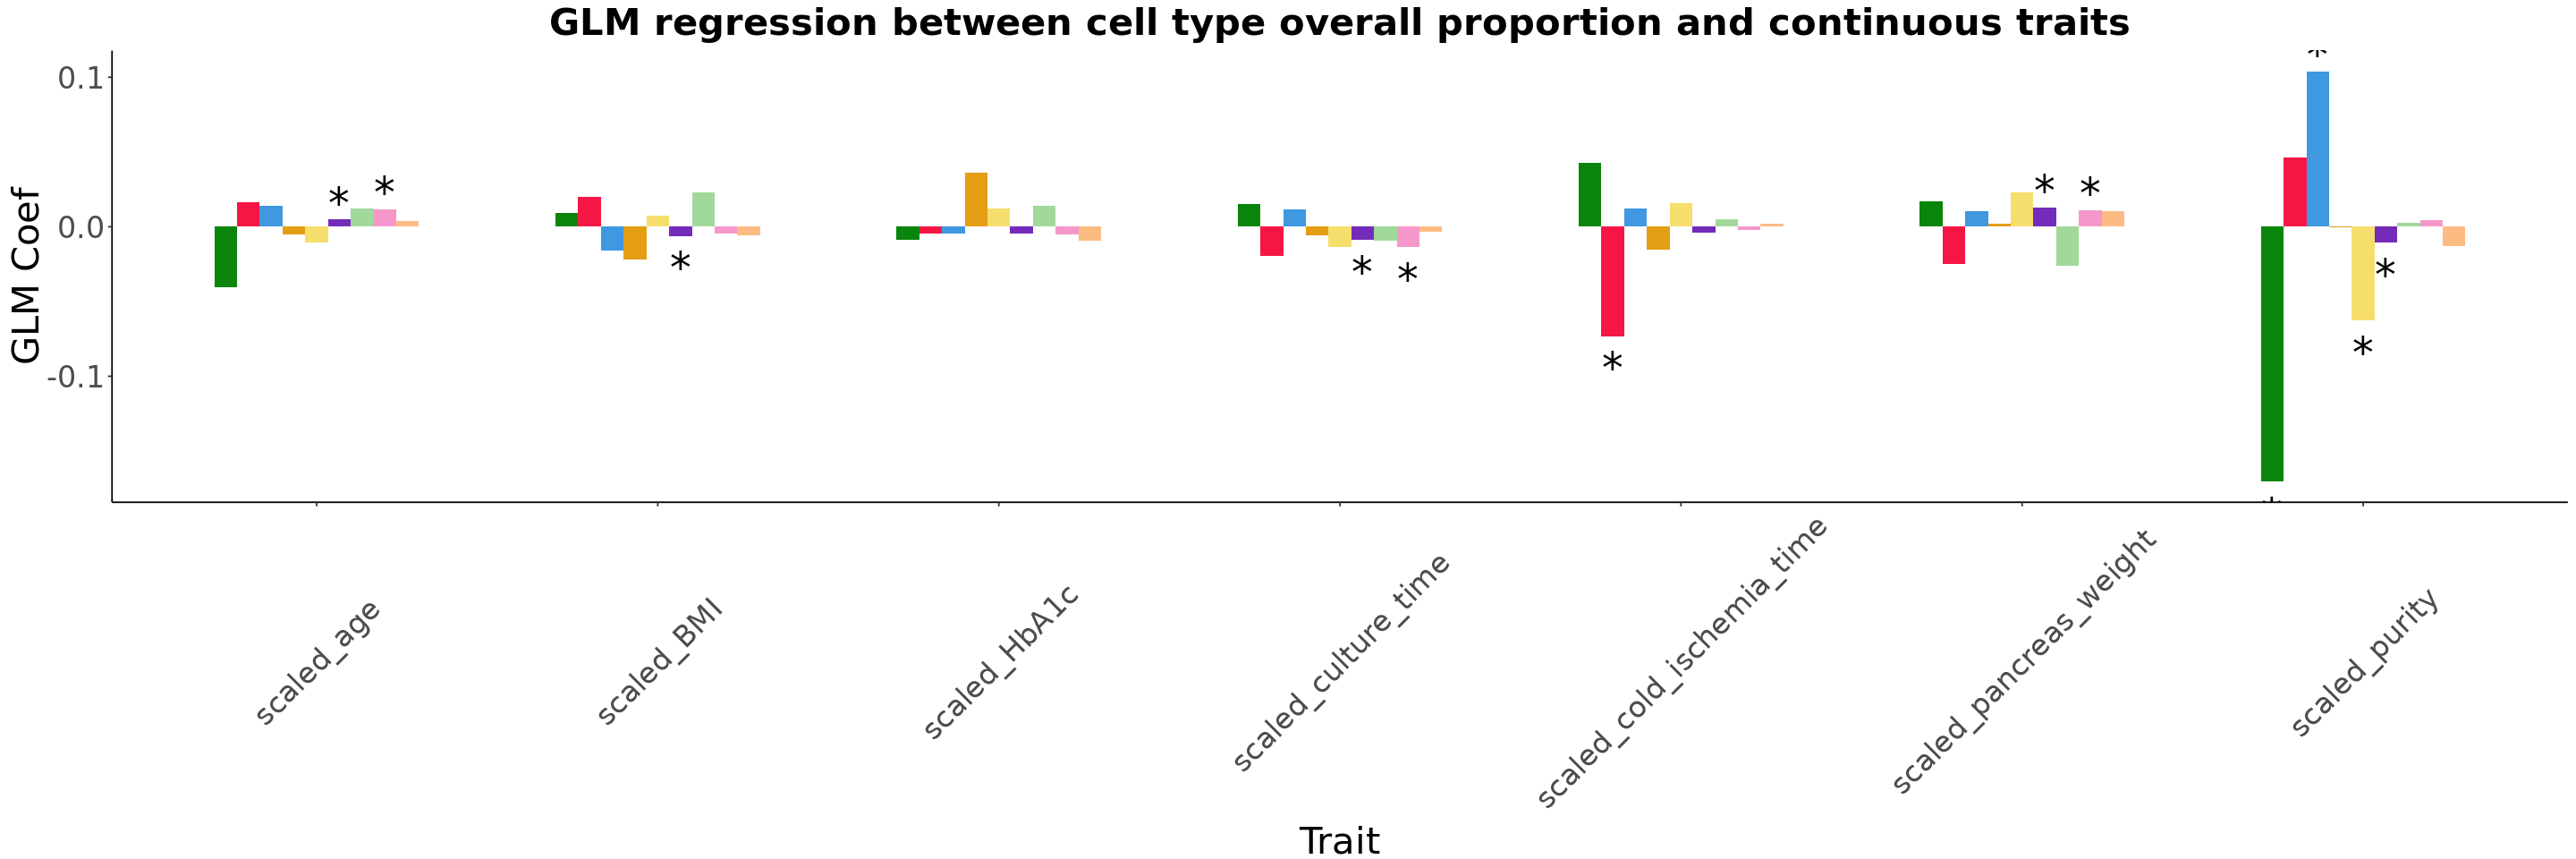

In [34]:
fp <- file.path(outdir,'metadata_total_prop_sqrt.multivar_glm.txt')
title <- 'GLM regression between cell type overall proportion and continuous traits'
plot_glm_summary(fp, title)

## anova results
high F-value means means of groups are more different (same with t-value)

In [36]:
### Function for reading in a glm output table and making a summary plot
plot_anova_summary <- function(fp, title, sig_cutoff=0.05){
    #read in file and format for plotting
    res2 <- read.table(fp, sep='\t', header=1)
    stat_colnames <- colnames(res2)[grepl('stat',colnames(res2))]
    pvalue_colnames <- colnames(res2)[grepl('pvalue',colnames(res2))]
    data <- cbind(reshape2::melt(as.matrix(res2[,stat_colnames])), reshape2::melt(res2[,pvalue_colnames])$value)
    colnames(data) <- c('feature', 'ct_prop', 'stat', 'pvalue')
    
    # Add in additional information needed for plotting
    data$celltype <- str_split_fixed(data$ct_prop, '\\.', 2)[,1]
    data$color <- major_colors[data$celltype]
    data$sig <- ifelse(data$pvalue <= sig_cutoff, '*', '')

    # Make grouped barplot of desired metadata
    options(repr.plot.width=12, repr.plot.height=6)
    theme_set(theme_classic())
    p1 <- ggplot(data, aes(fill=celltype, y=stat, x=feature)) + 
            geom_bar(position="dodge", width = 0.6, stat="identity") + 
            geom_text(aes(feature, stat, label=sig), position=position_dodge(width=0.6), size=10, vjust=-0.05) +
            labs(x = "Trait", y = "Stat (T-value or F-value)", color="Cell Type", title=title) + 
            scale_fill_manual(values=major_colors) +  
            theme(axis.text.x=element_text(size=18, vjust=0.5, angle=15),
                    axis.text.y=element_text(size=18, vjust=0.5),
                    axis.title.x = element_text(size=20, vjust=-0.35),
                    axis.title.y = element_text(size=20, vjust=0.5),
                    plot.title = element_text(size=20, hjust=0.5, face="bold"),
                    legend.position='none')
    print(p1)
}

No id variables; using all as measure variables



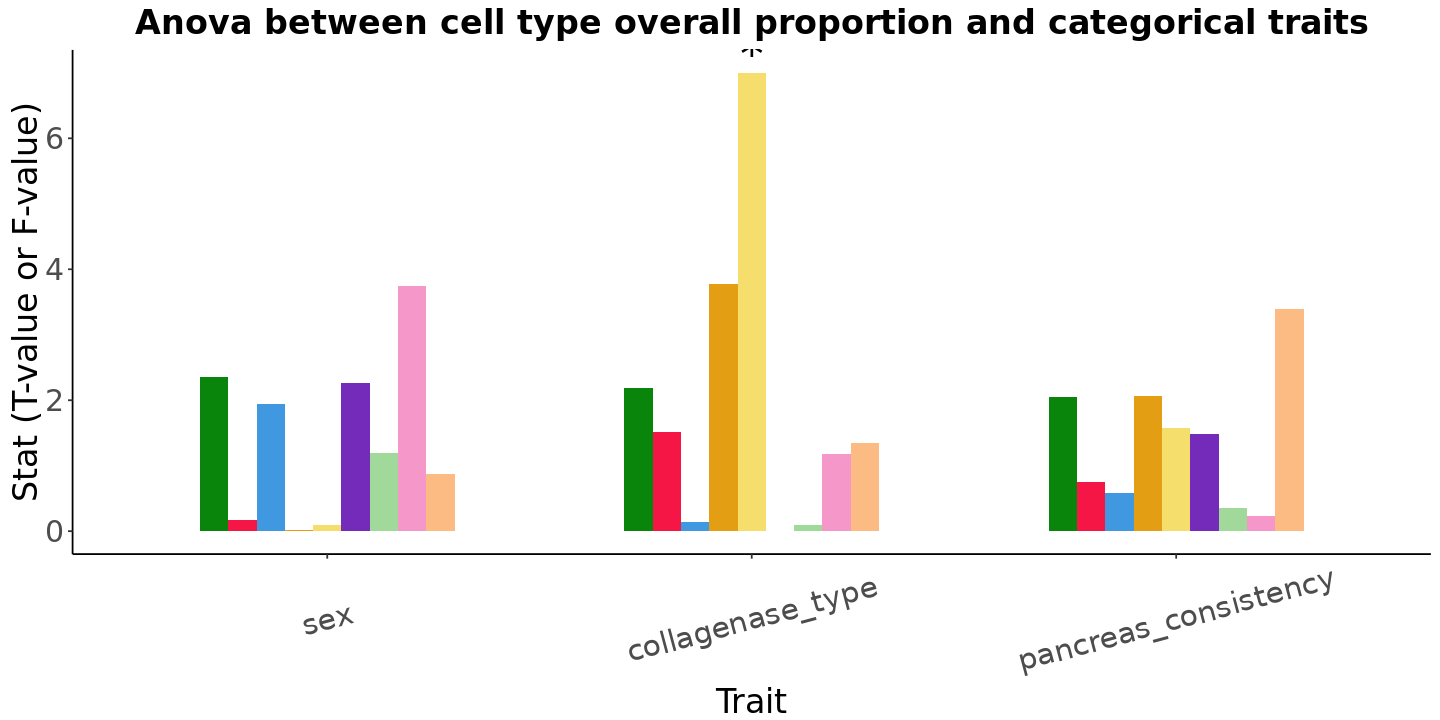

In [37]:
fp <- file.path(outdir,'metadata_total_prop_sqrt.anova_onesided.txt')
title <- 'Anova between cell type overall proportion and categorical traits'
plot_anova_summary(fp,title)

# Make plots for significant relationships of interest

In [65]:
### Function to compare the correlation of two columns in meta
### Also plots the relationship bt the two variables + a fit line?

compare_two_features <- function(meta, col1, col2, res_str, color, cont=TRUE){
    # Cut down dataframe for corr and ggplot 
    print(col1)
    print(col2)
    df <- meta[,c(col1, col2)]
    df <- df[!is.na(df[,col2]),]
    colnames(df) <- c('val1', 'val2')
    
    ### If is continuous variable make a scatter plot, otherwise make violin plot
    if(cont==TRUE){
        # Make basic plot to visualize relationship
        options(repr.plot.width=6, repr.plot.height=6)
        theme_set(
            theme_bw())
        p1 <- ggplot(data=df, aes(x=val1, y=val2)) + 
                geom_point(size=6, colour=color) + 
                labs(x = col1, y = col2, title=res_str) + 
                theme(axis.title=element_text(size=20),
                      axis.text.y=element_text(size=15),
                      axis.text.x=element_text(size=15, angle=30, vjust=0.5),
                      legend.title=element_text(size=15),
                      legend.text=element_text(size=15),
                      panel.grid.major=element_line(color='grey', size=0.5, linetype=2),
                      panel.grid.minor=element_blank(),
                      panel.border=element_rect(color='black',fill=NA, size=1))
    } else {
        # Make violinplot comparing cell type propotion across sex
        options(repr.plot.width=6, repr.plot.height=6)
        theme_set(
            theme_classic())

        p1 <- ggplot(data=df, aes(x=val2, y=val1)) + 
                geom_violin(trim=FALSE, fill=color) + 
                geom_boxplot(width=0.3, fill='white', alpha=.6) + 
                geom_dotplot(binaxis='y', stackdir='center', dotsize=1, fill='black') +
                labs(x = col2, y = col1, title=res_str) + 
                theme(axis.title=element_text(size=20),
                      axis.text.y=element_text(size=15),
                      axis.text.x=element_text(size=15, angle=30, vjust=0.5),
                      legend.title=element_text(size=15),
                      legend.text=element_text(size=15),
                      panel.grid.major=element_line(color='grey', size=0.5, linetype=2),
                      panel.grid.minor=element_blank(),
                      panel.border=element_rect(color='black',fill=NA, size=1))
    }
    return(p1)
}

In [43]:
wrapper_plot_sig_assocs <- function(meta, run_prefix, sig_cutoff=0.05){
    #read in data and remake meta_fin
    data_fp <- file.path(outdir, sprintf('Alberta_celltype_%s.txt',run_prefix))
    df <- read.table(data_fp, sep='\t', header=1)
    meta_fin <- cbind(meta, df)
    meta_fin <- meta_fin[row.names(meta_fin) != 'R316',]
    meta_fin <- meta_fin[row.names(meta_fin) != 'R275',]

    # read in GLM results and plot sig associations
    res_fp <- file.path(outdir, sprintf('metadata_%s.multivar_glm.txt', run_prefix))
    res_df <- read.table(res_fp, sep='\t')

    for (celltype in celltypes){
        for(trait in cont_vars){
            res_col1 <- paste0(celltype,'_',run_prefix,'_coef') ### update per test
            res_col2 <- paste0(celltype,'_',run_prefix,'_pvalue') ### update per test
            stat <- res_df[trait,res_col1]
            pval <- res_df[trait,res_col2]
            if (pval < sig_cutoff){
                res_str <- sprintf('sig GLM (%s, pvalue=%s)',substr(stat,1,4),substr(pval,1,4))
                p1 <- compare_two_features(meta_fin, paste(celltype,run_prefix,sep='_'), trait, res_str, major_colors[[celltype]], TRUE)
                print(p1)
            }
        }
    }   

    #read in ANOVA results and plot sig associations
    res_fp <- file.path(outdir, sprintf('metadata_%s.anova_onesided.txt',run_prefix))
    res_df <- read.table(res_fp, sep='\t')
    
    for (celltype in celltypes){
        for(trait in categ_covars){
            res_col1 <- paste0(celltype,'.stat') ### update per test
            res_col2 <- paste0(celltype,'.pvalue') ### update per test
            stat <- res_df[trait,res_col1]
            pval <- res_df[trait,res_col2]
            if (pval < sig_cutoff){
                res_str <- sprintf('sig ANOVA (%s, pvalue=%s)',substr(stat,1,4),substr(pval,1,4))
                p1 <- compare_two_features(meta_fin, paste0(celltype,'_',run_prefix), trait, res_str, major_colors[[celltype]], FALSE)
                print(p1)
            }
        }
    }
}

[1] "beta_total_prop_sqrt"
[1] "scaled_purity"
[1] "alpha_total_prop_sqrt"
[1] "scaled_cold_ischemia_time"


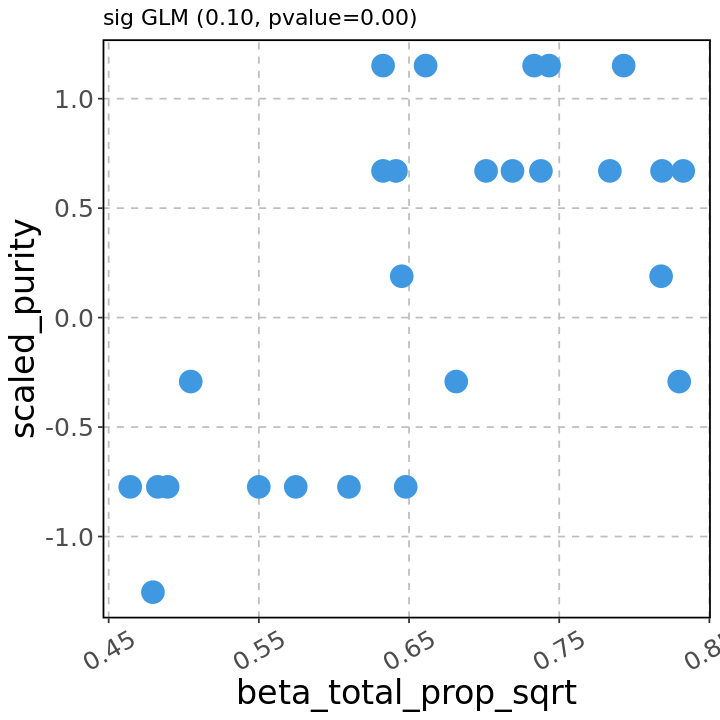

[1] "acinar_total_prop_sqrt"
[1] "scaled_purity"


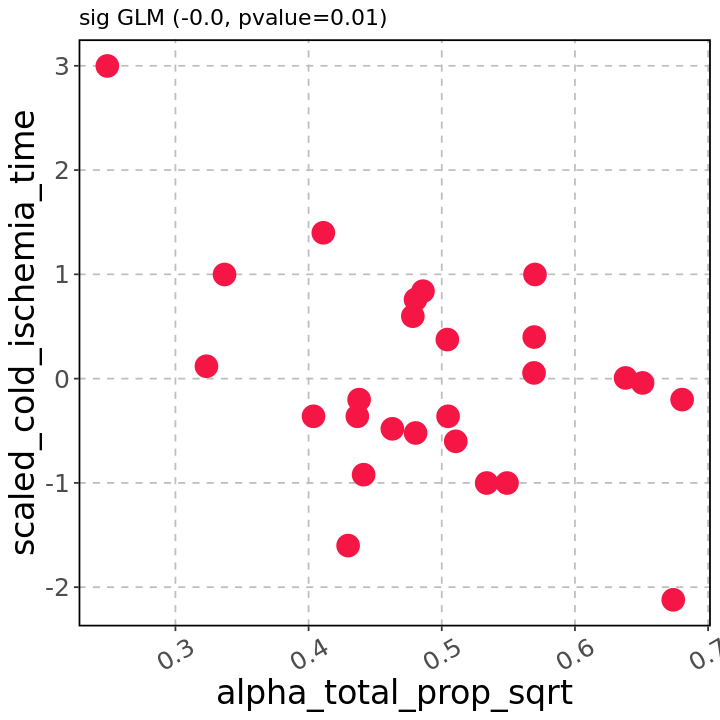

[1] "ductal_total_prop_sqrt"
[1] "scaled_purity"


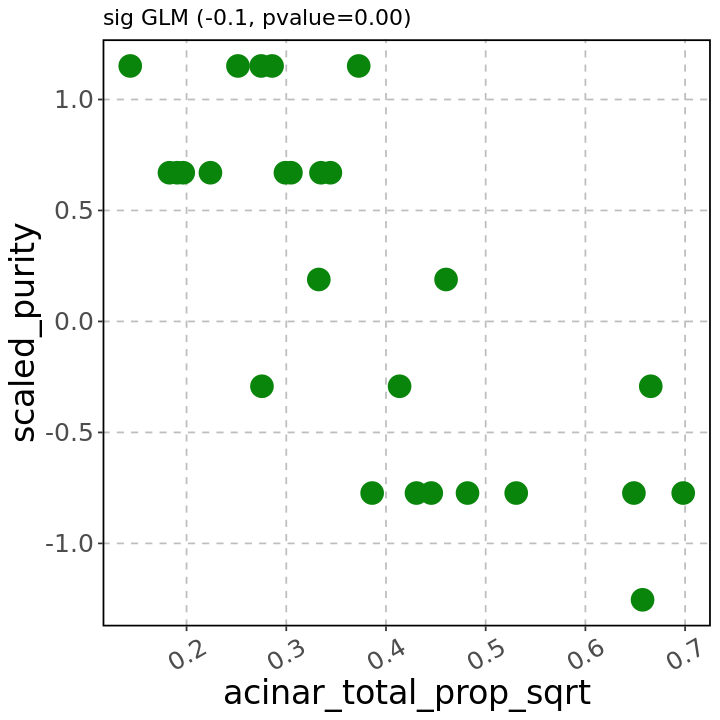

[1] "endothelial_total_prop_sqrt"
[1] "scaled_age"


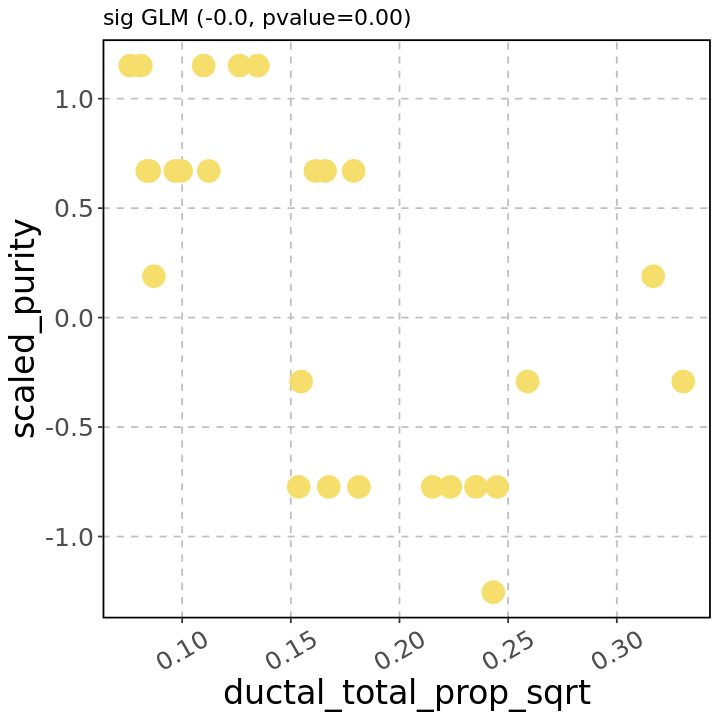

[1] "endothelial_total_prop_sqrt"
[1] "scaled_BMI"


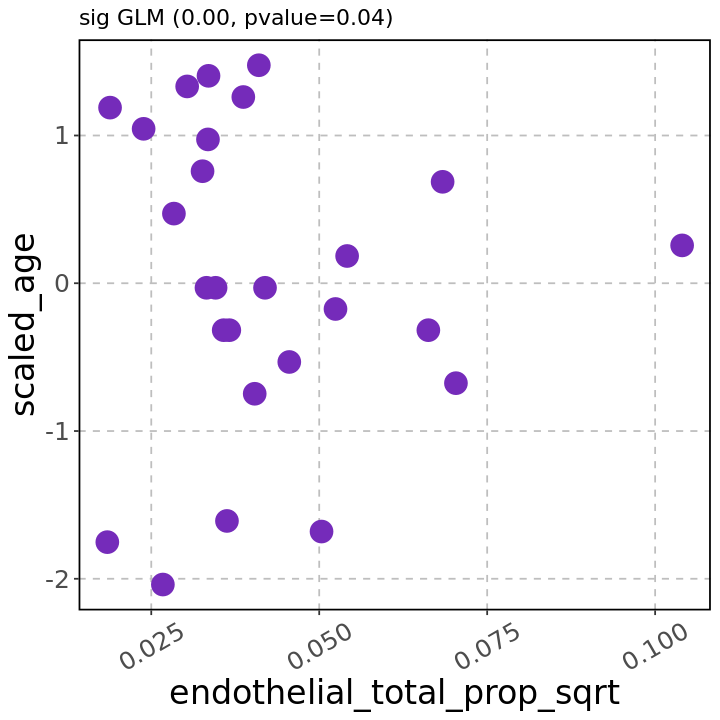

[1] "endothelial_total_prop_sqrt"
[1] "scaled_culture_time"


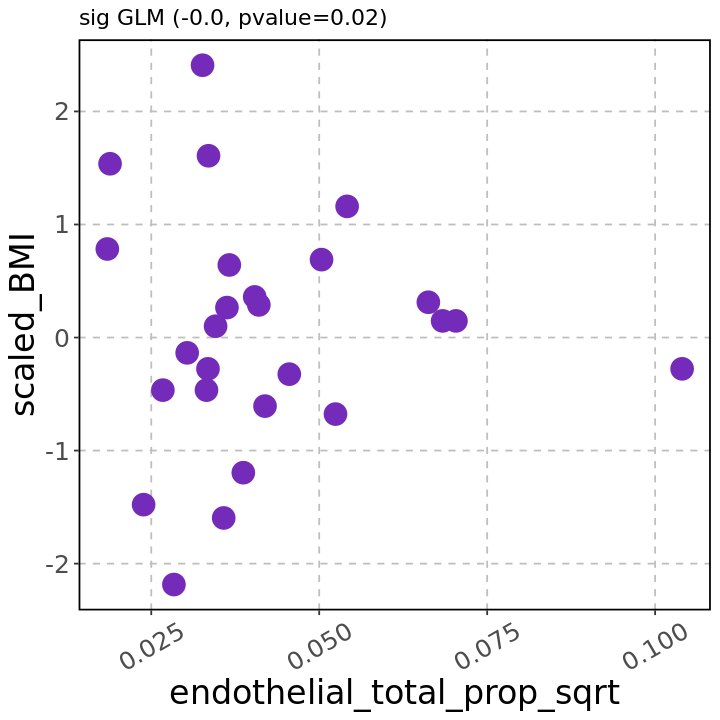

[1] "endothelial_total_prop_sqrt"
[1] "scaled_pancreas_weight"


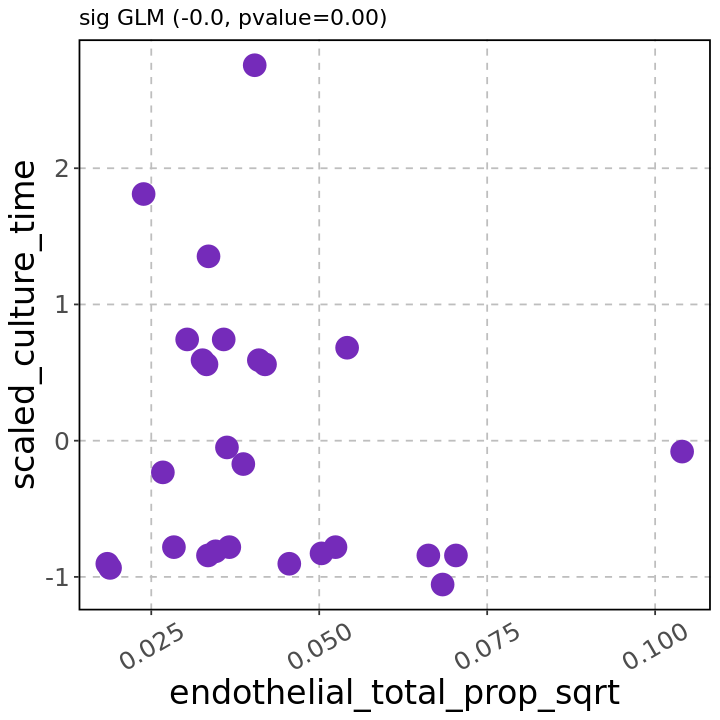

[1] "endothelial_total_prop_sqrt"
[1] "scaled_purity"


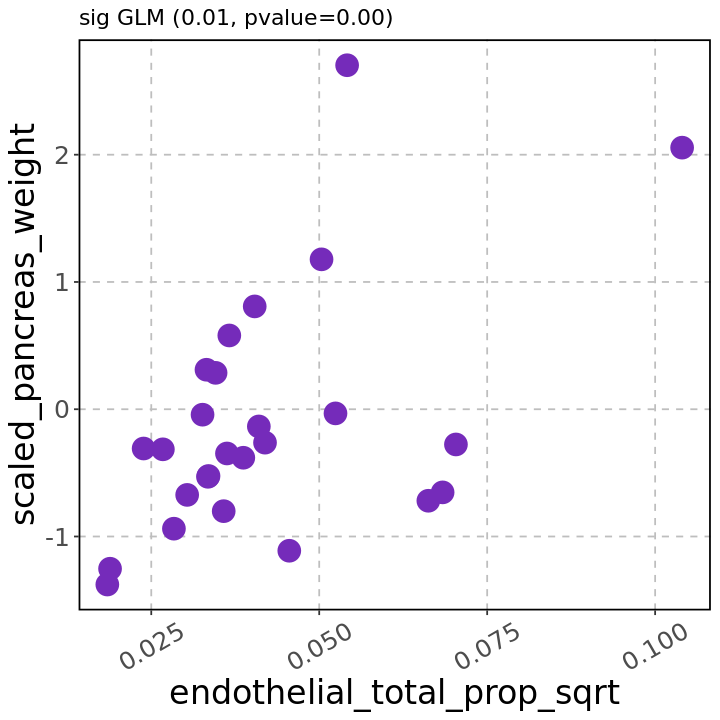

[1] "immune_total_prop_sqrt"
[1] "scaled_age"


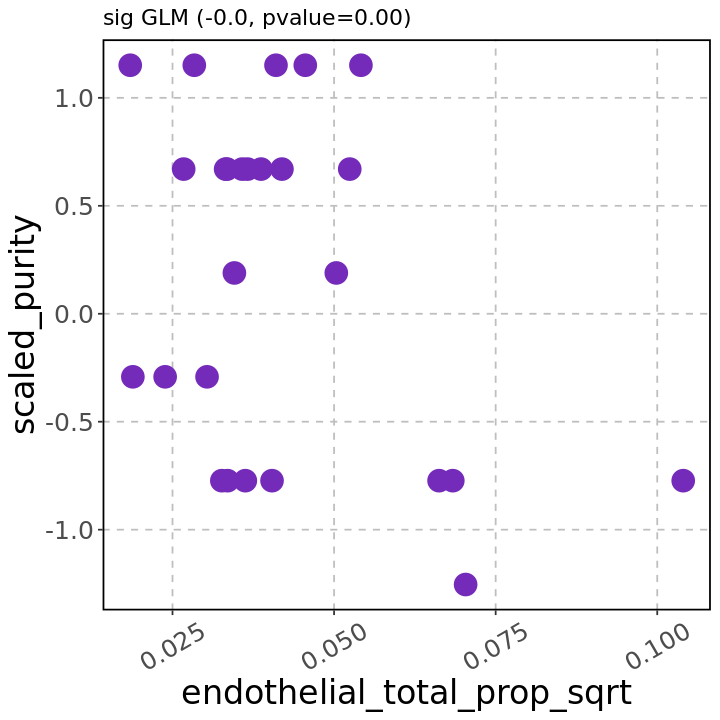

[1] "immune_total_prop_sqrt"
[1] "scaled_culture_time"


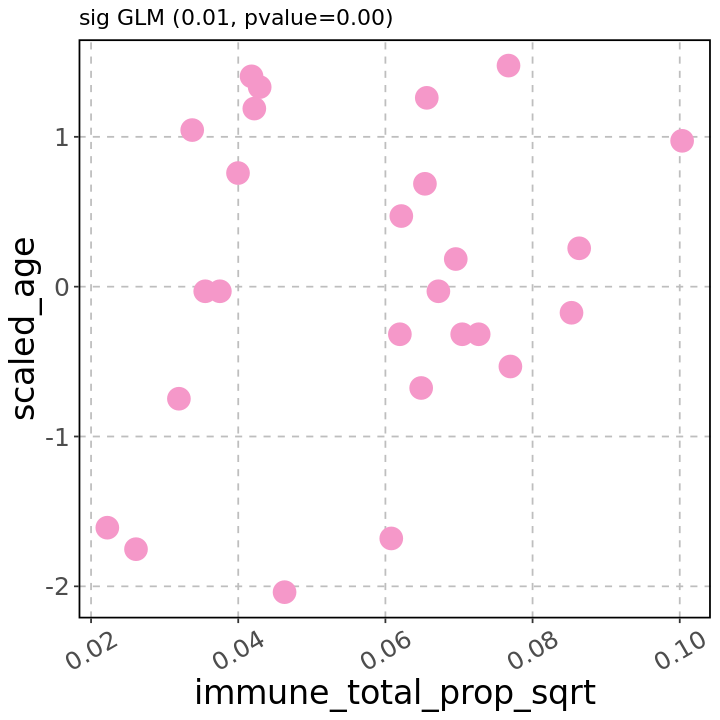

[1] "immune_total_prop_sqrt"
[1] "scaled_pancreas_weight"


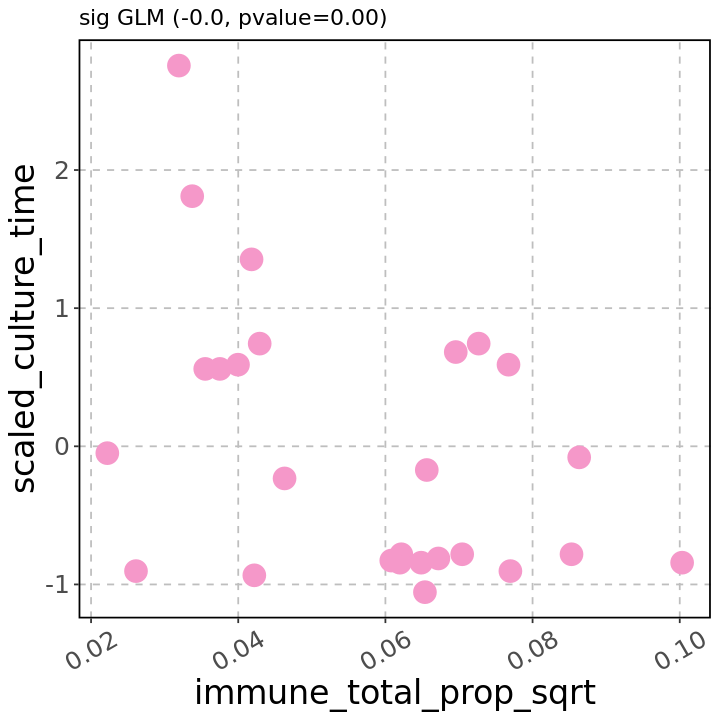

[1] "ductal_total_prop_sqrt"
[1] "collagenase_type"


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


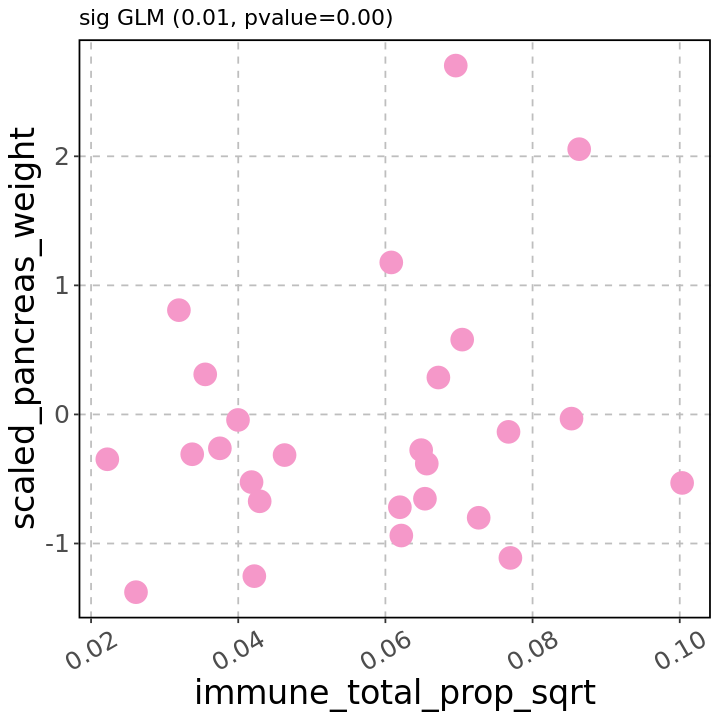

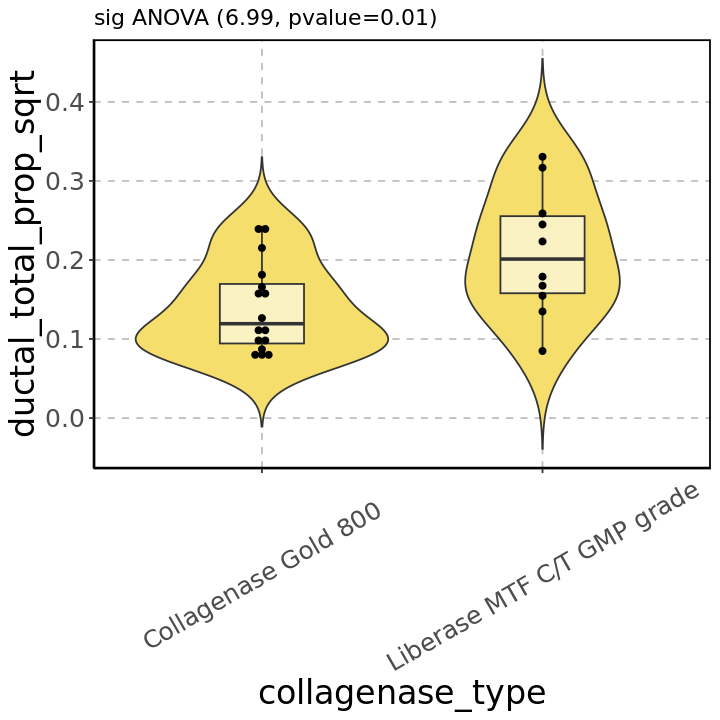

In [66]:
wrapper_plot_sig_assocs(meta, 'total_prop_sqrt')

In [42]:
### Function to compare the correlation of two columns in meta
### Also plots the relationship bt the two variables + a fit line?
### Assumes trait metadata is col1, and col2 is cell prop

compare_two_features_cortest <- function(meta, col1, col2, test_alternative){
    # Cut down dataframe for corr and ggplot 
    df <- meta[!is.na(meta[,col1]),c(col1, col2)]
    colnames(df) <- c('val1', 'val2')
    test_results <- cor.test(x=df$val1, y=df$val2, alternative=test_alternative, method='pearson', exact=TRUE)
    return(test_results)    
}


### Wrapper function which will apply cor.test to all combinations of meta traits and cell prop traits
### Also takes an input var for which alterative hypothesis to use for the cor.test (t,g,l)
cortest_wrapper <- function(meta, trait_list, ct_prop_list, test_alternative, prefix, outdir){
    # Create results df with filler columns (to set the row length)
    results <- data.frame(filler1=rep(0, length(trait_list)), filler2=rep(1, length(trait_list)))
     
    for (ct_prop in ct_prop_list){
        ct <- unlist(str_split(ct_prop, '_'))[1]
        ct_corr <- c()
        ct_pvalue <- c()
        for (trait in trait_list){
            test_results <- compare_two_features_cortest(meta, trait, ct_prop, test_alternative)
            ct_corr <- c(ct_corr, test_results$estimate)
            ct_pvalue <- c(ct_pvalue, test_results$p.value)
        }
        results <- cbind(results, data.frame(ct_corr, ct_pvalue))
    }
    # Finalize results formatting
    results <- results[,-c(1,2)]
    row.names(results) <- trait_list
    colnames(results) <- c(t(outer(ct_prop_list, c('cor', 'pvalue'), FUN = "paste", sep='_')))
    
    # Write results to a file and also return it for printouts
    fp <- file.path(outdir, sprintf('metadata_%s.cortest_%s.txt', prefix, test_alternative))
    write.table(results, fp, sep='\t', quote=FALSE)
    return(results)
}

### Run correlations -- greater and less separately and pick sig star based on cor direction

In [43]:
# prep list of cell type prop values to test
ct_props <- paste(celltypes, 'scaled_counts', sep='_')
ct_props
table(ct_props %in% colnames(meta_fin))

[1] "beta_scaled_counts"        "alpha_scaled_counts"      
[3] "delta_scaled_counts"       "gamma_scaled_counts"      
[5] "acinar_scaled_counts"      "ductal_scaled_counts"     
[7] "endothelial_scaled_counts" "immune_scaled_counts"     
[9] "stellate_scaled_counts"


TRUE 
   9 

In [46]:
# prep list of continuous metadata vars to test
cont_vars <- c('scaled_age','scaled_BMI','scaled_HbA1c','scaled_culture_time',
               'scaled_cold_ischemia_time','scaled_pancreas_weight','scaled_purity')

In [47]:
res1 <- cortest_wrapper(meta_fin, cont_vars, ct_props, 'greater', 'scaled_counts', outdir)
res2 <- cortest_wrapper(meta_fin, cont_vars, ct_props, 'less', 'scaled_counts', outdir)

In [48]:
# #test calculating qvalues per cell type prop

# for (celltype in celltypes){
#     print(celltype)
#     q <- p.adjust(res1[,paste0(celltype,'_scaled_counts_pvalue')], method='BH')
#     print(table(q < 0.1))
# }


## Plot cor.test results

In [53]:
sig_cutoff <- 0.05

In [64]:
#use both sets of results and choose more sig pvalue
cors <- res1[,grepl('cor', colnames(res1))]
p_greater <- res1[,grepl('pvalue', colnames(res1))]
p_less <- res2[,grepl('pvalue', colnames(res2))]

p_best <- list()
for (celltype in celltypes){
    colname <- paste0(celltype,'_scaled_counts_pvalue')
    p_best[[celltype]] <- pmin(p_greater[,colname],p_less[,colname])
}
p_best_df <- as.data.frame(p_best)
colnames(p_best_df) <- paste0(colnames(p_best_df),'_pvalue')
res_fin <- cbind(cors, p_best_df)

In [65]:
#format for plotting
cor_colnames <- colnames(res_fin)[grepl('cor',colnames(res_fin))]
pvalue_colnames <- colnames(res_fin)[grepl('pvalue',colnames(res_fin))]
data <- cbind(reshape2::melt(as.matrix(res_fin[,cor_colnames])), reshape2::melt(res[,pvalue_colnames])$value)
colnames(data) <- c('feature', 'ct_prop', 'cor', 'pvalue')

# Add in additional information needed for plotting
data$celltype <- str_split_fixed(data$ct_prop, '_', 3)[,1]
data$color <- major_colors[data$celltype]
data$sig_pos <- ifelse(data$pvalue <= sig_cutoff & data$cor > 0, '*', '')
data$sig_neg <- ifelse(data$pvalue <= sig_cutoff & data$cor < 0, '*', '')
head(data)

No id variables; using all as measure variables



,feature,ct_prop,cor,pvalue,celltype,color,sig_pos,sig_neg
,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,scaled_age,beta_scaled_counts_cor,0.009438815,0.48098989,beta,#3F98E0,,
2,scaled_BMI,beta_scaled_counts_cor,-0.195656499,0.15918783,beta,#3F98E0,,
3,scaled_HbA1c,beta_scaled_counts_cor,-0.151776913,0.24468035,beta,#3F98E0,,
4,scaled_culture_time,beta_scaled_counts_cor,0.293533169,0.06475486,beta,#3F98E0,,
5,scaled_cold_ischemia_time,beta_scaled_counts_cor,-0.313060956,0.05238993,beta,#3F98E0,,
6,scaled_pancreas_weight,beta_scaled_counts_cor,0.271901320,0.08080107,beta,#3F98E0,,


## Investigate weird purity associations with scaled counts

In [185]:
head(meta_fin)

,age,scaled_age,BMI,scaled_BMI,HbA1c,scaled_HbA1c,sex,culture_time,scaled_culture_time,cold_ischemia_time,⋯,collagenase_type,beta_scaled_counts,alpha_scaled_counts,delta_scaled_counts,gamma_scaled_counts,acinar_scaled_counts,ductal_scaled_counts,endothelial_scaled_counts,immune_scaled_counts,stellate_scaled_counts
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,50,-0.3176239,22.2,-1.5961071,NA,NA,Female,70,0.7433497,16.60,⋯,Liberase MTF C/T GMP grade,-7.733599,-7.651133,-7.695655,-7.595715,-7.448519,-7.575775,-7.358224,-7.275294,-7.383786
R217,71,1.1885281,35.5,1.5372102,6.3,1.7566453,Female,15,-0.9339522,35.00,⋯,Liberase MTF C/T GMP grade,-7.799422,-7.688162,-7.715787,-7.705090,-7.610753,-7.632750,-7.559138,-7.447502,-7.555983
R218,73,1.3319711,28.4,-0.1354630,5.9,0.9320975,Female,70,0.7433497,17.00,⋯,Liberase MTF C/T GMP grade,-7.587793,-7.522656,-7.527676,-7.341546,-7.283688,-7.352281,-7.435219,-7.112008,-7.482188
R221,44,-0.7479530,30.5,0.3592713,5.3,-0.3047242,Male,136,2.7561120,6.25,⋯,Liberase MTF C/T GMP grade,-7.606234,-7.625395,-7.609457,-7.473350,-7.345806,-7.502210,-7.437401,-7.479703,-7.386801
R223,54,-0.0307378,27.0,-0.4652858,5.8,0.7259606,Male,64,0.5603713,14.00,⋯,Liberase MTF C/T GMP grade,-7.793955,-7.690319,-7.687380,-7.646098,-7.438699,-7.585146,-7.464328,-7.502954,-7.583763
R226,30,-1.7520544,32.3,0.7833293,4.9,-1.1292720,Female,16,-0.9034558,18.60,⋯,Collagenase Gold 800,-7.887544,-7.780197,-7.855236,-7.779442,-7.507496,-7.720138,-7.351571,-7.770643,-7.573149


In [207]:
cols <- paste0(celltypes,'_scaled_counts')
data <- meta_fin %>% select(purity, all_of(cols)) %>% 
        arrange(purity) %>%
        tibble::rownames_to_column(var='library')

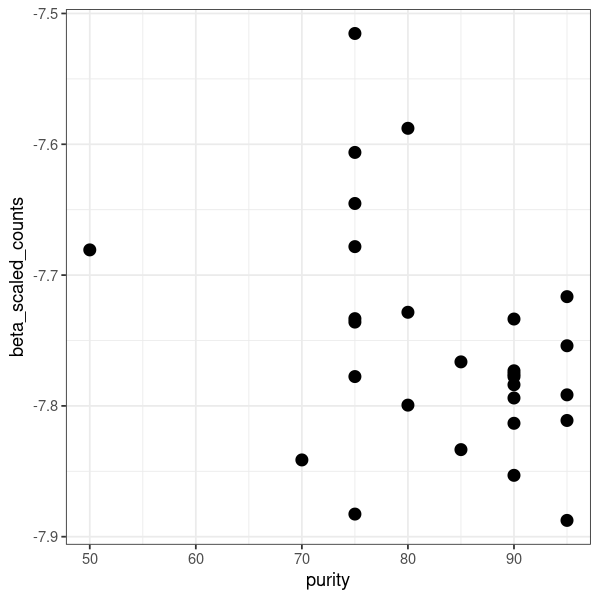

In [208]:
options(repr.plot.height=5, repr.plot.width=5)
ggplot(data, aes(x=purity, y=beta_scaled_counts)) +
        geom_point(size=3)

In [209]:
#calc raw prop beta cells to compare (bt all cell types)
num_cells <- as.data.frame(table(adata$library,adata$major_celltypes_fin))
num_cells <- num_cells %>% rename(library=Var1, celltype=Var2, cells=Freq) %>%
                tidyr::pivot_wider(names_from=celltype, values_from=cells) %>%
                group_by(library) %>%
                mutate(total_cells=sum(acinar,alpha,beta,delta,ductal,endothelial,gamma,immune,stellate))
head(num_cells)

library,acinar,alpha,beta,delta,ductal,endothelial,gamma,immune,stellate,total_cells
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R207,580,2025,3229,217,45,8,99,33,12,6248
R217,2489,348,1431,150,614,2,569,10,6,5619
R218,165,227,1496,133,52,2,83,4,10,2172
R221,2389,905,1057,183,294,8,44,5,17,4902
R223,711,1616,3453,225,203,7,101,8,19,6343
R226,815,1492,3242,193,34,2,79,4,8,5869


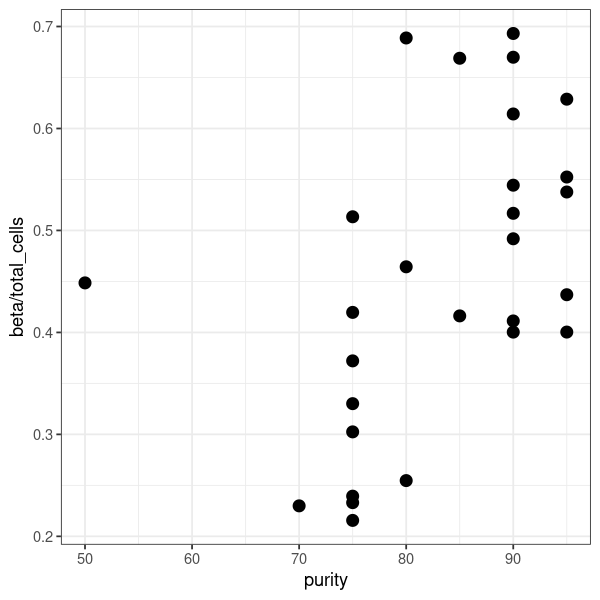

In [210]:
options(repr.plot.height=5, repr.plot.width=5)
data2 <- left_join(data, num_cells, by='library')

ggplot(data2, aes(x=purity, y=beta/total_cells)) +
        geom_point(size=3)

In [239]:
#pull min and max beta cell proportion numbers for paper results
#LOL move this to figure making section so it doesn't get lost
prop_beta <- num_cells$beta/num_cells$total_cells
sort(prop_beta)

[1] 0.2156263 0.2298936 0.2330395 0.2393949 0.2546716 0.3024494 0.3301274
 [8] 0.3720814 0.4002996 0.4003364 0.4112363 0.4162002 0.4196380 0.4369667
[15] 0.4485677 0.4643416 0.4918351 0.5134111 0.5168054 0.5377093 0.5443796
[22] 0.5523939 0.6142305 0.6287390 0.6688803 0.6698725 0.6887661 0.6931781